In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import quandl
from datetime import datetime
import pandas_datareader.data as web

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock] = quandl.get('WIKI/{}'.format(stock), start_date=start, end_date=end)

In [4]:
AAPL.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.0,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,157.066670,158.167914,155.923287,157.114014,2.800609e+07,0.005040,1.0,156.676036,157.774885,155.535005,156.723108,2.800609e+07
std,11.735283,11.903371,11.625647,11.761172,1.192224e+07,0.056236,0.0,12.121884,12.293505,12.005083,12.145534,1.192224e+07
min,137.080000,137.435000,136.280000,136.930000,1.394898e+07,0.000000,1.0,135.969633,136.321757,135.176113,135.820848,1.394898e+07
25%,145.747500,147.145000,144.945000,145.987500,2.022628e+07,0.000000,1.0,145.158527,146.179385,144.264654,145.296170,2.022628e+07
50%,156.062500,157.245000,155.020000,155.935000,2.483966e+07,0.000000,1.0,156.012500,157.030000,154.595000,155.799010,2.483966e+07
75%,169.052500,170.193525,167.037500,169.032500,3.216067e+07,0.000000,1.0,169.052500,170.193525,167.037500,169.032500,3.216067e+07
max,179.370000,180.100000,178.250000,179.260000,8.543608e+07,0.630000,1.0,179.370000,180.100000,178.250000,179.260000,8.543608e+07


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2017-02-27 to 2018-02-26
Data columns (total 12 columns):
Open           250 non-null float64
High           250 non-null float64
Low            250 non-null float64
Close          250 non-null float64
Volume         250 non-null float64
Ex-Dividend    250 non-null float64
Split Ratio    250 non-null float64
Adj. Open      250 non-null float64
Adj. High      250 non-null float64
Adj. Low       250 non-null float64
Adj. Close     250 non-null float64
Adj. Volume    250 non-null float64
dtypes: float64(12)
memory usage: 25.4 KB


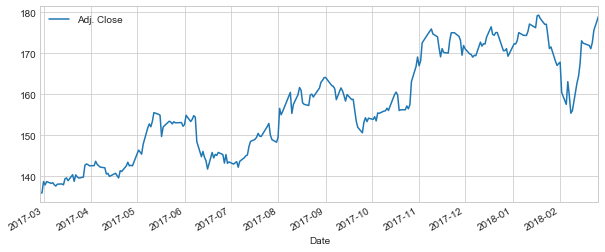

In [6]:
AAPL['Adj. Close'].plot(legend=True, figsize=(10, 4))

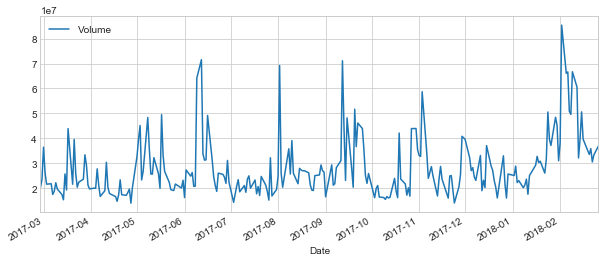

In [7]:
AAPL['Volume'].plot(legend=True, figsize=(10, 4))

In [8]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj. Close'], ma)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.


In [9]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50
Date,,,,,,,,,,,,,,,
2017-02-27,137.14,137.4350,136.280,136.93,20257426.0,0.0,1.0,136.029147,136.321757,135.176113,135.820848,20257426.0,NaN,NaN,NaN
2017-02-28,137.08,137.4350,136.700,136.99,23482860.0,0.0,1.0,135.969633,136.321757,135.592711,135.880362,23482860.0,NaN,NaN,NaN
2017-03-01,137.89,140.1500,137.595,139.79,36414585.0,0.0,1.0,136.773071,139.014765,136.480461,138.657681,36414585.0,NaN,NaN,NaN
2017-03-02,140.00,140.2786,138.760,138.96,26210984.0,0.0,1.0,138.865980,139.142323,137.636024,137.834404,26210984.0,NaN,NaN,NaN
2017-03-03,138.78,139.8300,138.590,139.78,21571121.0,0.0,1.0,137.655862,138.697357,137.467401,138.647762,21571121.0,NaN,NaN,NaN


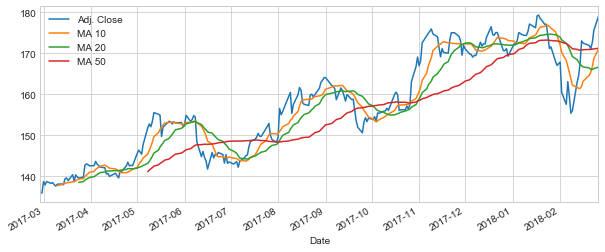

In [10]:
AAPL[['Adj. Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [11]:
AAPL['Daily Return'] = AAPL['Adj. Close'].pct_change()

In [12]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,,,,,,,
2017-02-27,137.14,137.4350,136.280,136.93,20257426.0,0.0,1.0,136.029147,136.321757,135.176113,135.820848,20257426.0,NaN,NaN,NaN,NaN
2017-02-28,137.08,137.4350,136.700,136.99,23482860.0,0.0,1.0,135.969633,136.321757,135.592711,135.880362,23482860.0,NaN,NaN,NaN,0.000438
2017-03-01,137.89,140.1500,137.595,139.79,36414585.0,0.0,1.0,136.773071,139.014765,136.480461,138.657681,36414585.0,NaN,NaN,NaN,0.020439
2017-03-02,140.00,140.2786,138.760,138.96,26210984.0,0.0,1.0,138.865980,139.142323,137.636024,137.834404,26210984.0,NaN,NaN,NaN,-0.005937
2017-03-03,138.78,139.8300,138.590,139.78,21571121.0,0.0,1.0,137.655862,138.697357,137.467401,138.647762,21571121.0,NaN,NaN,NaN,0.005901


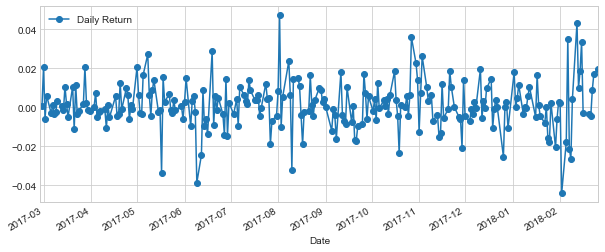

In [13]:
AAPL['Daily Return'].plot(figsize=(10, 4), legend=True, marker='o')

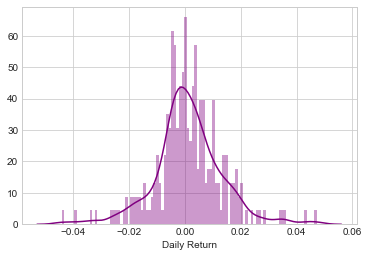

In [14]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

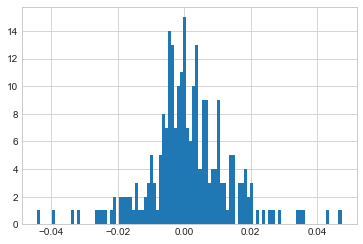

In [15]:
AAPL['Daily Return'].hist(bins=100)

In [16]:
closing_df = DataFrame()
for stock in tech_list:
    closing_df[stock] = quandl.get('WIKI/{}'.format(stock), start_date=start, end_date=end)['Adj. Close']

In [17]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-02-27,135.820848,829.28,63.212771,848.64
2017-02-28,135.880362,823.21,62.966731,845.04
2017-03-01,138.657681,835.24,63.911527,853.08
2017-03-02,137.834404,830.63,62.996255,848.91
2017-03-03,138.647762,829.08,63.232455,849.88


In [18]:
tech_rets = closing_df.pct_change()

In [19]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-02-27,NaN,NaN,NaN,NaN
2017-02-28,0.000438,-0.007320,-0.003892,-0.004242
2017-03-01,0.020439,0.014614,0.015005,0.009514
2017-03-02,-0.005937,-0.005519,-0.014321,-0.004888
2017-03-03,0.005901,-0.001866,0.003749,0.001143


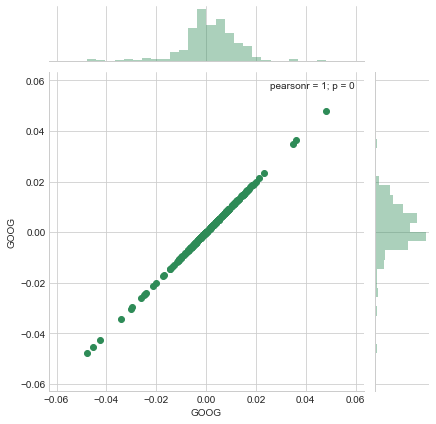

In [20]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

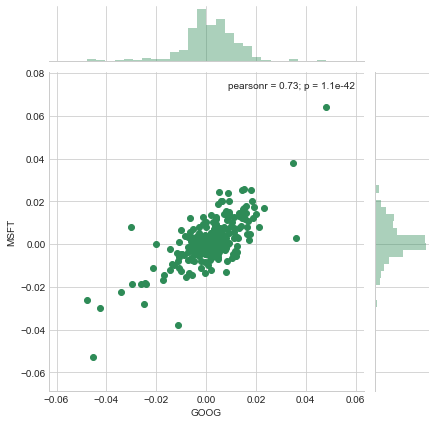

In [21]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

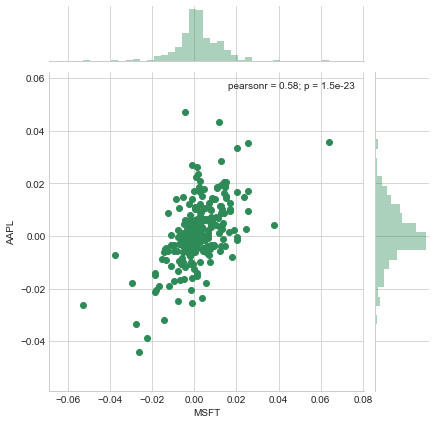

In [22]:
sns.jointplot('MSFT', 'AAPL', tech_rets, kind='scatter', color='seagreen')

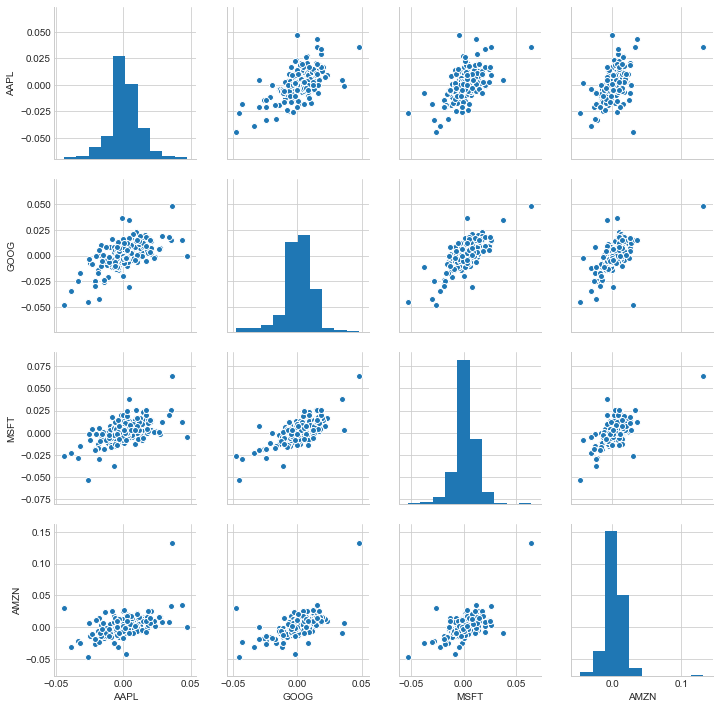

In [23]:
sns.pairplot(tech_rets.dropna())

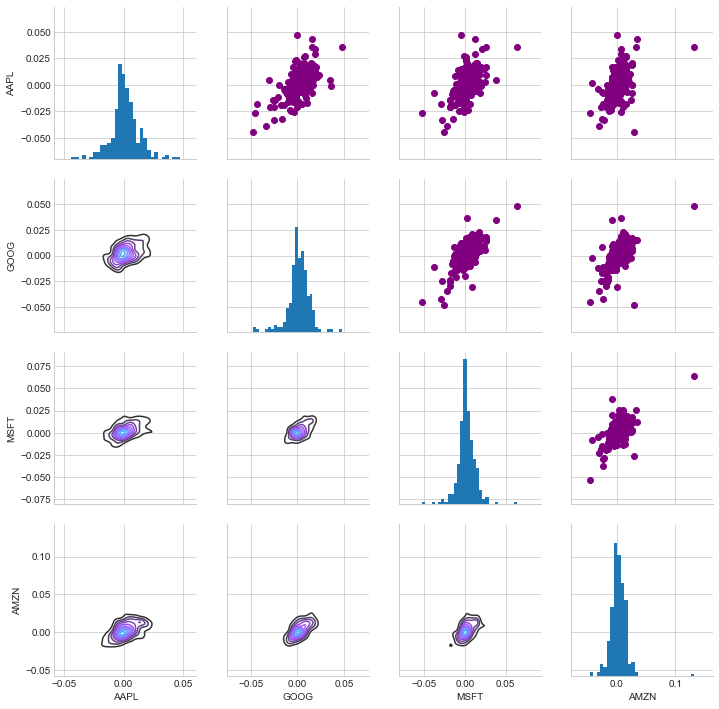

In [24]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

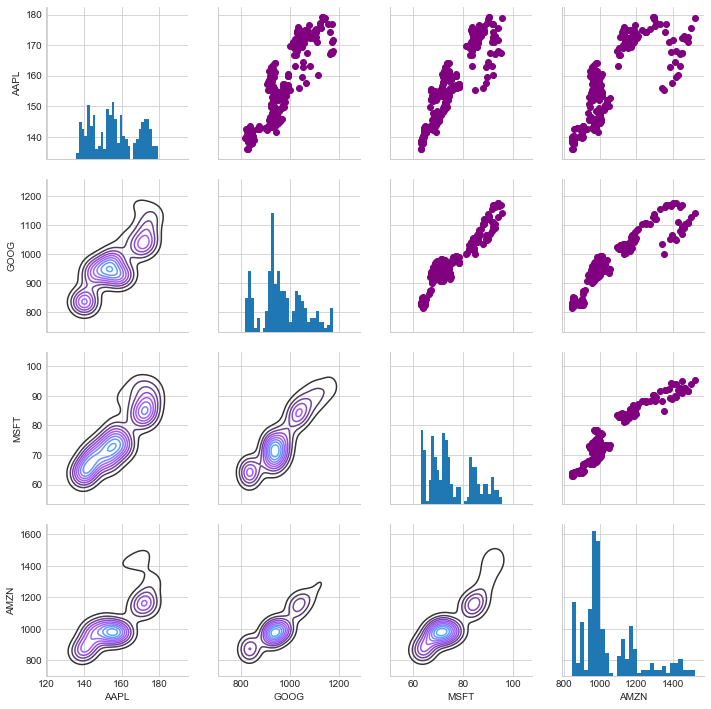

In [25]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

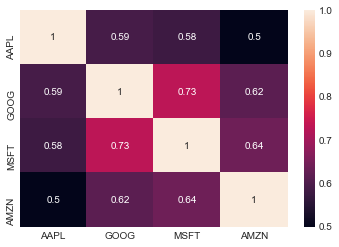

In [26]:
sns.heatmap(tech_rets.corr(), annot=True)

In [27]:
rets = tech_rets.dropna()

In [28]:
rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-02-28,0.000438,-0.007320,-0.003892,-0.004242
2017-03-01,0.020439,0.014614,0.015005,0.009514
2017-03-02,-0.005937,-0.005519,-0.014321,-0.004888
2017-03-03,0.005901,-0.001866,0.003749,0.001143
2017-03-06,-0.003148,-0.001568,0.000311,-0.003848


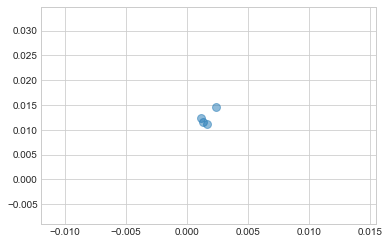

In [29]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)

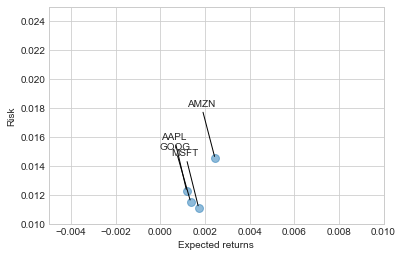

In [30]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)
plt.ylim([0.01, 0.025])
plt.xlim([-0.005, 0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(0, 50),
                textcoords='offset points', ha='right', va='bottom',
                arrowprops=dict(arrowstyle='-', connectionstyle='arc3'))

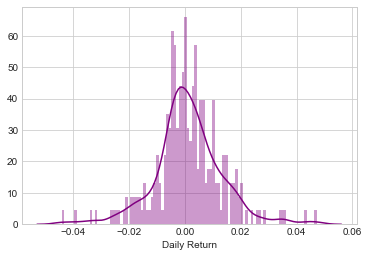

In [31]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [32]:
rets['AAPL'].quantile(0.05)

-0.01852184794769569

In [33]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [37]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [38]:
GOOG.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-02-27,824.55,830.500,824.000,829.28,1101466.0,0.0,1.0,824.55,830.500,824.000,829.28,1101466.0
2017-02-28,825.61,828.540,820.200,823.21,2260769.0,0.0,1.0,825.61,828.540,820.200,823.21,2260769.0
2017-03-01,828.85,836.255,827.260,835.24,1496540.0,0.0,1.0,828.85,836.255,827.260,835.24,1496540.0
2017-03-02,833.85,834.510,829.640,830.63,942476.0,0.0,1.0,833.85,834.510,829.640,830.63,942476.0
2017-03-03,830.56,831.360,825.751,829.08,896378.0,0.0,1.0,830.56,831.360,825.751,829.08,896378.0


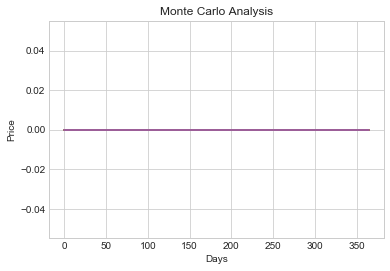

In [39]:
start_price = GOOG.iloc[0, 5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')